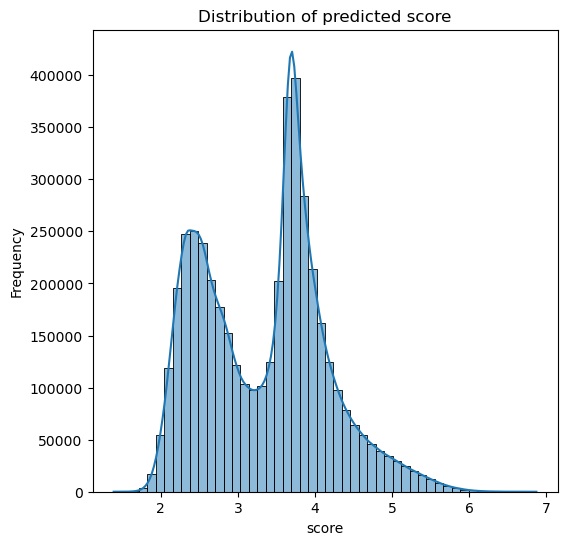

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

file_location_path = Path.cwd()
project_base_path = file_location_path.parent.parent

directory_path = project_base_path / 'data' / 'processed' / 'landscape_score' 

all_files = glob.glob(os.path.join(directory_path, "*.csv"))

scores = []


for file in all_files:
    df = pd.read_csv(file)
    if "predicted_score" in df.columns:
        scores.extend(df["predicted_score"].tolist())
    else:
        print(f"文件 {file} 中未找到 'predicted_score' 列")


scores_df = pd.DataFrame(scores, columns=["predicted_score"])

plt.figure(figsize=(6, 6))
sns.histplot(scores_df["predicted_score"], bins=50, kde=True)
plt.title("Distribution of predicted score")
plt.xlabel("score")
plt.ylabel("Frequency")
plt.show()
